Import necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install --upgrade seaborn
# !pip install scikit-plot
import scikitplot as skplt

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import f1_score , fbeta_score ,matthews_corrcoef , log_loss , make_scorer ,balanced_accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report , roc_curve , roc_auc_score , precision_score, recall_score,precision_recall_curve,auc,average_precision_score,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV , learning_curve
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline , make_pipeline
#test
# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import (OneHotEncoder,power_transform,StandardScaler)

Load the dataset

In [ ]:
df=pd.read_csv('/content/sample_data/predictive_maintenance.csv')

Print first five rows of the dataser

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


 Displays the count of each unique category in the 'Failure Type' column.
 This is useful to understand the distribution of failure types in the dataset,
helping identify class imbalances or the most frequent failure types.


In [ ]:
df['Failure Type'].value_counts()



Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

Drops the 'Product ID', 'UDI', 'Target', and 'Type' columns from the DataFrame.
These columns are likely irrelevant for the analysis or model, as they might be identifiers or non-informative features.
The 'inplace=True' ensures that the changes are made directly to the original DataFrame

In [ ]:
df.drop(['Product ID','UDI','Target','Type'],axis=1,inplace=True)

Print first ten rows of the dataset

In [ ]:
df.head(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,298.1,308.6,1551,42.8,0,No Failure
1,298.2,308.7,1408,46.3,3,No Failure
2,298.1,308.5,1498,49.4,5,No Failure
3,298.2,308.6,1433,39.5,7,No Failure
4,298.2,308.7,1408,40.0,9,No Failure
5,298.1,308.6,1425,41.9,11,No Failure
6,298.1,308.6,1558,42.4,14,No Failure
7,298.1,308.6,1527,40.2,16,No Failure
8,298.3,308.7,1667,28.6,18,No Failure
9,298.5,309.0,1741,28.0,21,No Failure


Heat map to indicate and if correlation exists among feature and class columns

In [ ]:
# plt.figure(figsize=(10,10))
# sns.heatmap(df.corr(),annot=True,cmap="RdYlBu")
# plt.draw()


Checks if there are any missing values (NaN) in the entire DataFrame.
Returns True if any missing values are found, otherwise returns False.
Useful for identifying if data cleaning

In [ ]:
df.isnull().values.any()

False

 To effectively implement any of the data transformation strategies we have to visually analyze each feature first , simple histogram and boxplot help to detect distributions . For our dataset we create a histogram for all feature in order to understand the distributions.
 Visualizing the distribution of each feature in a dataset using histograms means plotting a graph that shows how the values of each feature are spread out.

 using histograms to visualize each feature helps you gain insights into the structure and properties of the data, guiding your next steps in analysis or preprocessing.

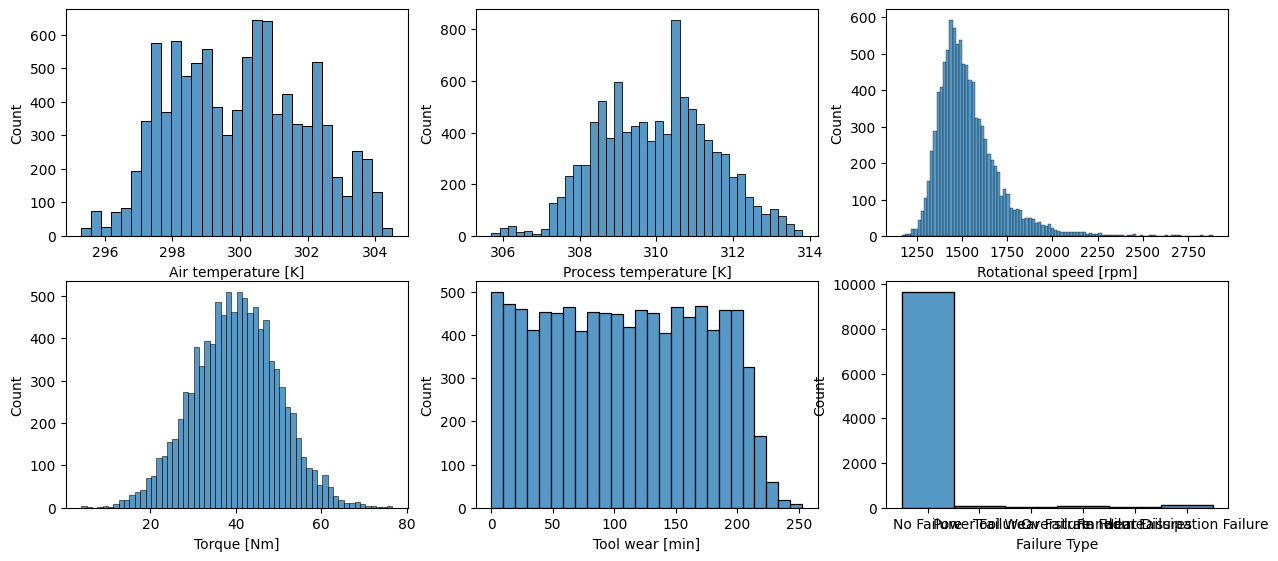

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
  plt.subplot(3,3,i)
  sns.histplot(df[col])
plt.show()


array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>],
       [<Axes: title={'center': 'Tool wear [min]'}>, <Axes: >]],
      dtype=object)

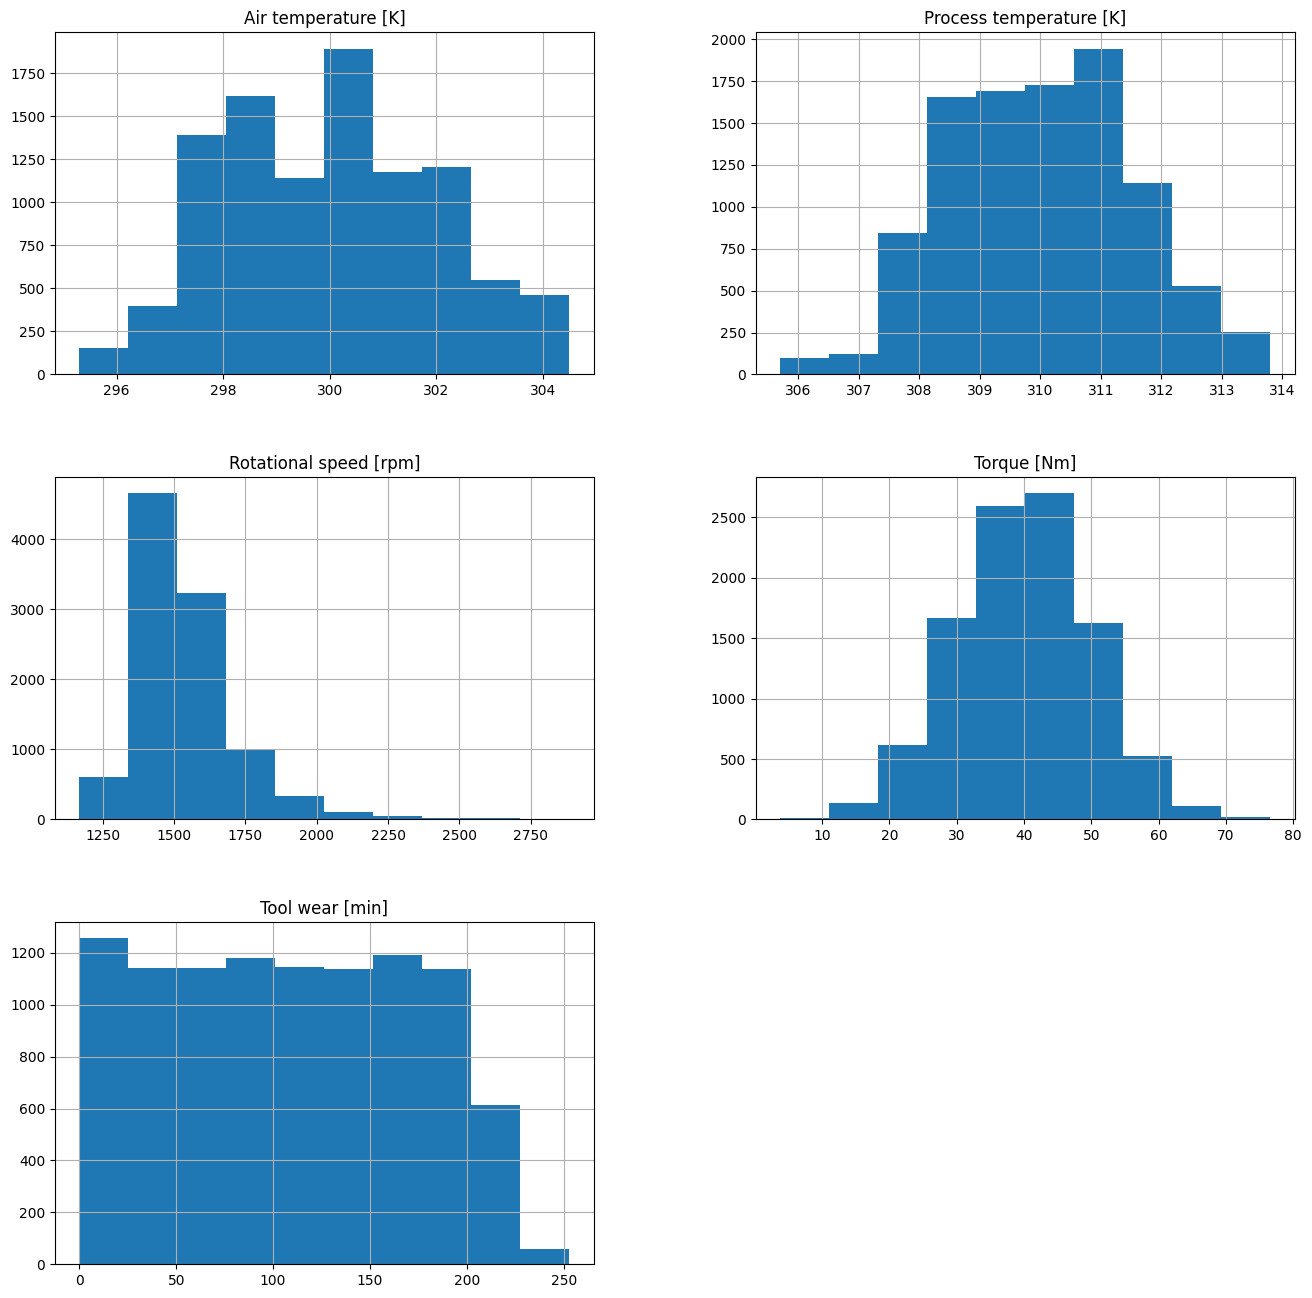

In [ ]:
df.hist(figsize=(16,16))

Provides insights such as count, mean, standard deviation, min, max, and percentiles (25%, 50%, 75%).
Useful for getting an overview of the data distribution and identifying outliers or anomalies.

In [ ]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


create scatter plot that visualizes the relationship between two numerical features: "Air temperature [K]" and "Process temperature [K]". Additionally, the plot distinguishes points based on the "Failure Type" column using both color (hue) and size (size).
# New Section

hue="Failure Type": Colors the points based on the "Failure Type" category. Different colors represent different failure types, allowing you to visually distinguish between them.

size="Failure Type": Adjusts the size of the points based on the "Failure Type" category. Larger or smaller points help emphasize the categories.

sizes=(120, 10): Defines the range of point sizes. In this case, the largest points will have a size of 120, and the smallest will have a size of 10.

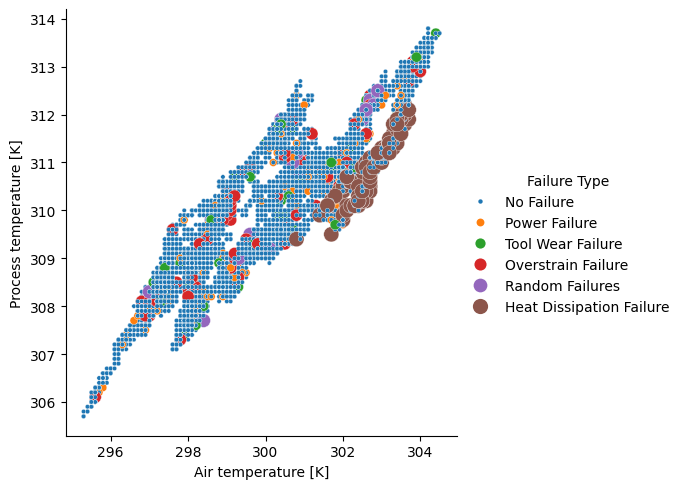

In [ ]:
_ = sns.relplot(x="Air temperature [K]",
                y="Process temperature [K]",
                hue="Failure Type" ,
                size="Failure Type",
                sizes=(120,10),
                data=df)

create a scatter plot that visualizes the relationship between two numerical features: "Torque [Nm]" and "Process "Rotational speed [rpm]".

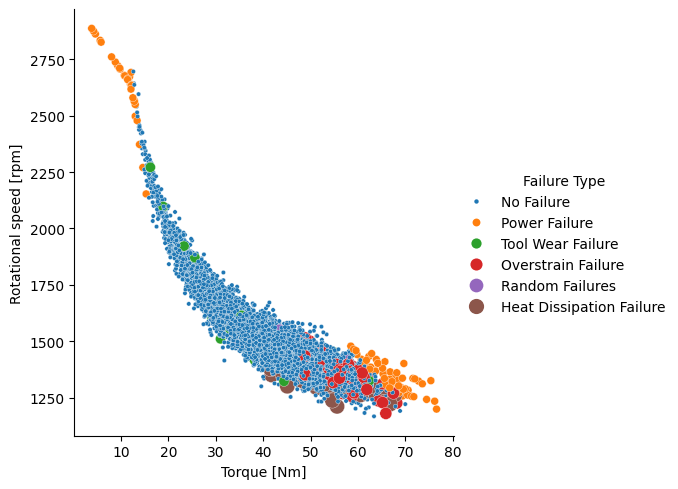

In [ ]:
_ = sns.relplot(x="Torque [Nm]",
                y="Rotational speed [rpm]" ,
                hue="Failure Type" ,
                size="Failure Type",
                sizes=(120,10),
                data=df)

create a scatter plot that visualizes the relationship between two numerical features: "Tool wear [min]" and "Process "Torque [Nm]".

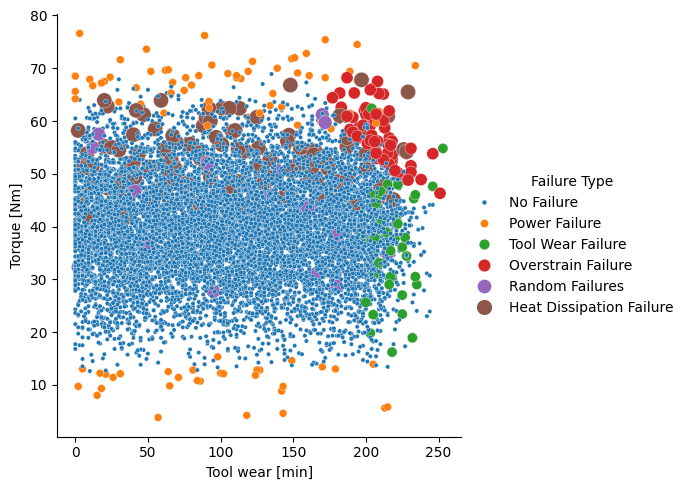

In [ ]:
_ = sns.relplot(x="Tool wear [min]",
                y="Torque [Nm]" ,
                hue="Failure Type" ,
                size="Failure Type",
                sizes=(120,10),
                data=df)

Print columns Name

In [ ]:
col_name = df.columns.to_list()
col_name

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Failure Type']

Selects the first 5 columns from 'col_name' to use as features for prediction.
'predictive_columns' is a list containing the names of these columns.
Creates the feature matrix 'x' from these selected columns and the target variable 'y' from the 'Failure Type' column.
'x' will be used to train the model, and 'y' will be used as the target variable to predict.

In [ ]:
predictive_columns = col_name[0:5]
x=df[predictive_columns]
y=df['Failure Type']

initializes the SMOTETomek class from the imblearn library, which combines the SMOTE technique for oversampling the minority class with Tomek Links for cleaning the data by removing ambiguous or overlapping samples. It then applies this resampling technique to the feature matrix x and target variable y, resulting in a balanced dataset (x_resampled and y_resampled)

In [ ]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
x_resampled.shape

(57862, 5)

pd.DataFrame(x_resampled): Converts the numpy array x_resampled into a DataFrame called df_x. This DataFrame will have the same feature columns as the original dataset but with the resampled data.

pd.DataFrame(y_resampled): Converts the numpy array y_resampled into a DataFrame called df_y. This DataFrame will contain the resampled target variable values.

In [ ]:
df_x = pd.DataFrame(x_resampled)
df_y = pd.DataFrame(y_resampled)

 Concatenates the DataFrames 'df_x' and 'df_y' along the columns (axis=1).
 'df_x' contains the features and 'df_y' contains the target variable.
 The result is a single DataFrame 'df1' that combines the features and target variable side by side.
 This is useful for having all the data in one DataFrame, which is often needed for further analysis or exporting.

In [ ]:
df1 = pd.concat([df_x, df_y], axis=1)

 Displays the count of each unique category in the 'Failure Type' column of the DataFrame 'df1'.
 This helps understand the distribution of failure types in the combined dataset after resampling.
 Useful for verifying class balance and ensuring the resampling process has produced the desired distribution.

In [ ]:
df1['Failure Type'].value_counts()

Failure Type
Overstrain Failure          9652
Heat Dissipation Failure    9648
Tool Wear Failure           9647
Power Failure               9645
Random Failures             9643
No Failure                  9627
Name: count, dtype: int64

create a scatter plot that visualizes the relationship between two numerical features: "Tool wear [min]" and "Process "Rotational speed [rpm]"

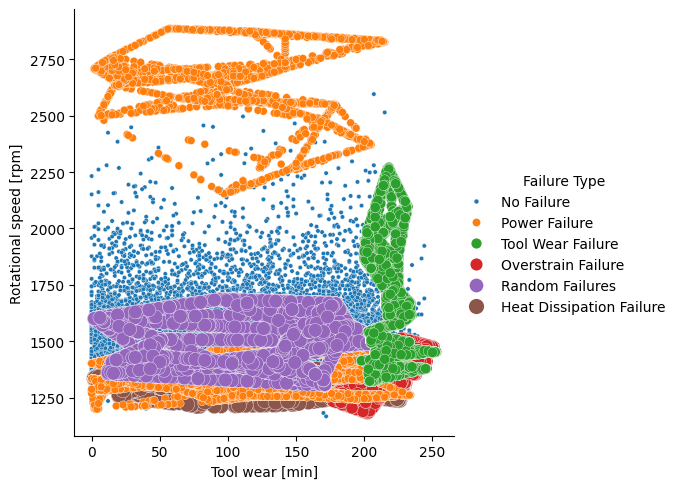

In [ ]:
_ = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]" ,
                hue="Failure Type" ,
                size="Failure Type",
                sizes=(120,10),
                data=df1)

 Retrieves the list of column names from the DataFrame 'df1' and assigns it to the variable 'col_name'.
'df1.columns.to_list()' converts the DataFrame's column names into a Python list.

In [ ]:
col_name = df1.columns.to_list()
col_name

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Failure Type']

Selects the first 5 columns from the list 'col_name' to use as features for prediction.
'predictive_columns' is a list containing these column names.
Creates the feature matrix 'x' from the selected columns and the target variable 'y' from the 'Failure Type' column.
'x' contains the features for modeling, and 'y' contains the target variable that the model will predict.


In [ ]:
predictive_columns = col_name[0:5]
x=df1[predictive_columns]
y=df1["Failure Type"]

 StratifiedKFold is used for cross-validation while preserving the percentage of samples for each class.
- n_splits=5: Specifies that the dataset will be split into 5 folds. Each fold will be used as a test set once while the remaining folds are used as the training set.
- shuffle=True: Indicates that the data should be shuffled before splitting into folds. This helps in reducing bias and ensures random distribution of data across folds.
- random_state=42: Sets a random seed to ensure reproducibility of the shuffle operation. This ensures that the same splits are produced every time the code is run.

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


In [ ]:
for train_index,test_index in skf.split(x,y):
  x1_train , x1_test = x.iloc[train_index] , x.iloc[test_index]
  y1_train , y1_test = y.iloc[train_index] , y.iloc[test_index]
  train_0 , train_1 = len(y1_train[y1_train==0]) , len(y1_train[y1_train==1])
  test_0 ,test_1 = len(y1_test[y1_test==0]), len(y1_test[y1_test==1])
  print('train: 0=%d , 1=%d , test: 0=%d, 1=%d' % (train_0 , train_1 , test_0,test_1))

train: 0=0 , 1=0 , test: 0=0, 1=0
train: 0=0 , 1=0 , test: 0=0, 1=0
train: 0=0 , 1=0 , test: 0=0, 1=0
train: 0=0 , 1=0 , test: 0=0, 1=0
train: 0=0 , 1=0 , test: 0=0, 1=0


Splits the dataset into training and test sets.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=40, stratify=y)

#Bulid catagorical preprocessor

Identifies and lists the categorical columns in the feature DataFrame 'x'.
'select_dtypes(include='object')' selects columns with data type 'object', which typically indicates categorical variables.
'columns.to_list()' converts the column names of these categorical columns into a Python list.

In [ ]:
catagorical_columns = x.select_dtypes(include='object').columns.to_list()
catagorical_columns


[]

#Creates a pipeline

 Creates a pipeline for preprocessing categorical features.
 'make_pipeline' is used to assemble a sequence of data processing steps into a single pipeline.
 'OneHotEncoder' is applied to convert categorical variables into a one-hot encoded format.
 - sparse=False: Ensures the output is a dense array rather than a sparse matrix.
 - handle_unknown='ignore': Prevents errors when encountering categories in the test set that were not present in the training set.

In [ ]:
categorical_pipe = make_pipeline(OneHotEncoder(sparse=False,handle_unknown='ignore'))


#Bulid numeric processor

In [ ]:
to_log = ["Rotational speed [rpm]","Tool wear [min]"]
to_scale = ["Air temperature [K]","Process temperature [K]","Torque [Nm]"]
numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())


#Full processor

In [ ]:
full = ColumnTransformer(
    transformers=[
        ('catagorical', categorical_pipe, catagorical_columns),
        ('log_power_transform', numeric_pipe_1, to_log),
        ('scale_standardization', numeric_pipe_2, to_scale)
    ]
)